# Programas de TV e filmes listados no Netflix

Este conjunto de dados consiste em programas de TV e filmes disponíveis no Netflix a partir de 2019. O conjunto de dados é coletado do Flixable, um mecanismo de pesquisa de terceiros da Netflix.

Em 2018, eles lançaram um relatório interessante que mostra que o número de programas de TV na Netflix quase triplicou desde 2010. O número de filmes do serviço de streaming diminuiu em mais de 2.000 títulos desde 2010, enquanto seu número de programas de TV quase triplicou. Será interessante explorar o que todos os outros insights podem ser obtidos no mesmo conjunto de dados.

Integrar este conjunto de dados com outros conjuntos de dados externos, como classificações IMDB, tomates podres também pode fornecer muitas descobertas interessantes.

Inspiração

Algumas das questões interessantes (tarefas) que podem ser realizadas neste conjunto de dados -

1.Compreender qual conteúdo está disponível em diferentes países

2.Identificar conteúdo semelhante combinando recursos baseados em texto

3.Análise de rede de atores / diretores e encontrar insights interessantes

4.A Netflix tem se concentrado cada vez mais na TV ao invés de filmes nos últimos anos.

Novas perguntas:
1. Quais os países que mais lançaram filmes e séries
2. Qual o tipo de conteúdo que mais foi lançado na netflix 
3. Qual odireitor que mais lançou filmes ou série


# 0.0 Importação

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


In [2]:
df = pd.read_csv("netflix_titles.csv") 

In [3]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


# 1.0 Exploração dos dados

In [4]:
df.shape

(7787, 12)

In [5]:
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [6]:
df.dtypes

show_id         object
type            object
title           object
director        object
cast            object
country         object
date_added      object
release_year     int64
rating          object
duration        object
listed_in       object
description     object
dtype: object

In [7]:
df["date_added"]=pd.to_datetime(df["date_added"])

In [8]:
df.dtypes

show_id                 object
type                    object
title                   object
director                object
cast                    object
country                 object
date_added      datetime64[ns]
release_year             int64
rating                  object
duration                object
listed_in               object
description             object
dtype: object

In [9]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020-08-14,2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016-12-23,2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,2018-12-20,2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,2017-11-16,2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,2020-01-01,2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [11]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020-08-14,2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016-12-23,2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,2018-12-20,2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,2017-11-16,2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,2020-01-01,2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [12]:
df.country.value_counts().head(15)
                            

United States     2555
India              923
United Kingdom     397
Japan              226
South Korea        183
Canada             177
Spain              134
France             115
Egypt              101
Mexico             100
Turkey             100
Australia           83
Taiwan              78
Brazil              72
Philippines         71
Name: country, dtype: int64

# 2.0 Visualização dos dados

Text(0.5, 1.0, 'Top 15 - tipos_de_filme_por_país')

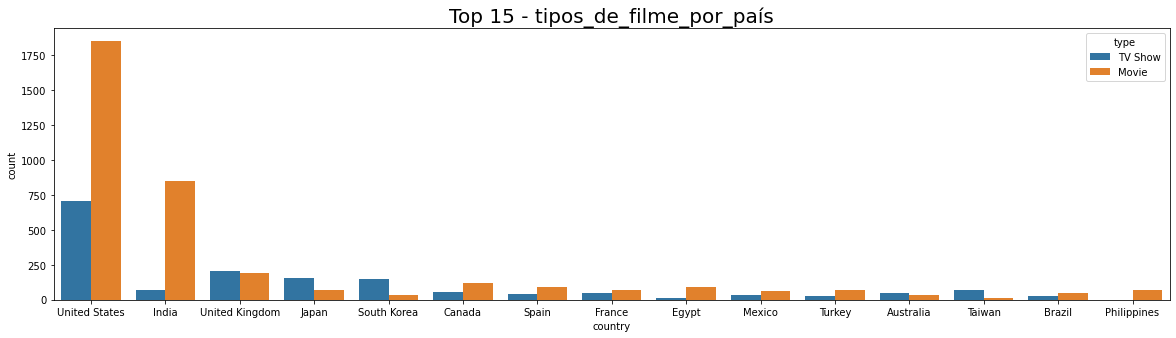

In [13]:
plt.subplots(figsize=(20,5))
tipos_de_filme_por_país= df.country.value_counts().head(15)
sns.countplot(x= df.country, order= tipos_de_filme_por_país.index, hue= df.type)
plt.title('Top 15 - tipos_de_filme_por_país', fontsize= 20)

Text(0.5, 1.0, 'Lançamentos por ano')

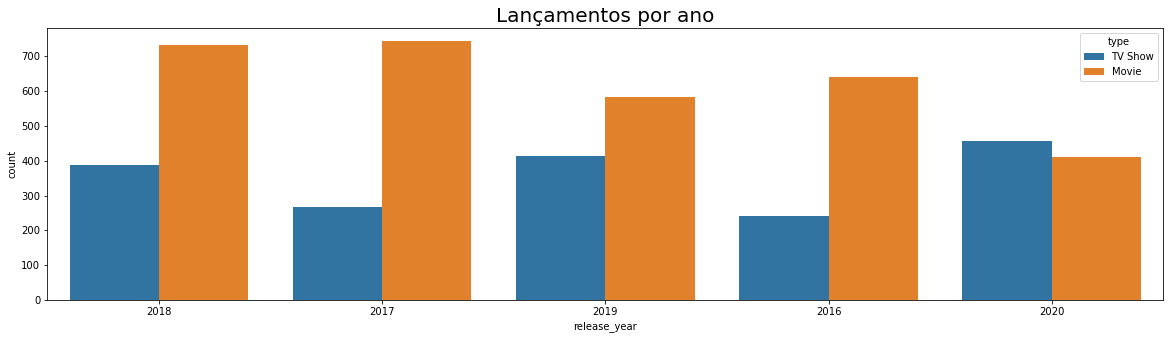

In [14]:
plt.subplots(figsize=(20,5))
quantidade_de_lancamentos_por_ano= df.release_year.value_counts().head()
sns.countplot(x= df.release_year, order= quantidade_de_lancamentos_por_ano.index, hue= df.type)
plt.title('Lançamentos por ano', fontsize= 20)

<AxesSubplot:>

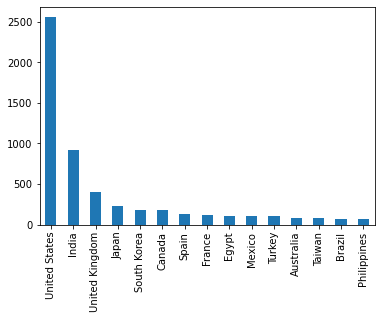

In [15]:
# Os 15 países que mais lançaram filmes e séries
df.country.value_counts().head(15).plot.bar()

<AxesSubplot:>

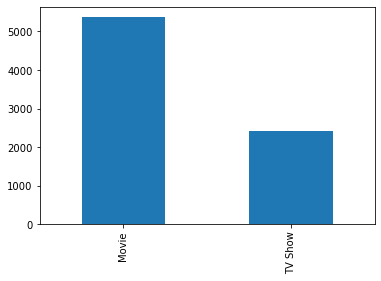

In [16]:
# Quantidade de lançamento entre movie e Tv Show
df["type"].value_counts().plot.bar()

In [17]:
df["director"].describe()

count                       5398
unique                      4049
top       Raúl Campos, Jan Suter
freq                          18
Name: director, dtype: object

<AxesSubplot:>

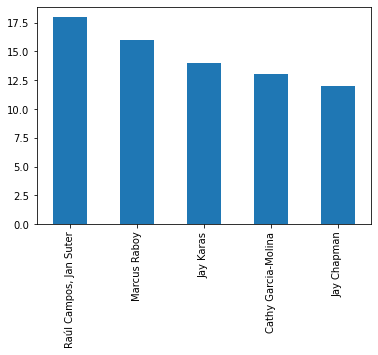

In [18]:
# Os 5 Direitores que mais lançaram filmes e series
df["director"].value_counts().head(5).plot.bar()

In [19]:
# Busca a quantidade de vezes que a palavra (pode ser uma parte da palavra) é encontrada na coluna do DataFrame
df[df["listed_in"].str.contains("Dramas")].count()

show_id         2810
type            2810
title           2810
director        2137
cast            2795
country         2685
date_added      2809
release_year    2810
rating          2809
duration        2810
listed_in       2810
description     2810
dtype: int64

In [20]:
# Dividir o DataFrame original pelo tipo de conteúdo
# Tv Show
df_tv_show = df[df["type"] == "TV Show"]

df_tv_show.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020-08-14,2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
5,s6,TV Show,46,Serdar Akar,"Erdal Beşikçioğlu, Yasemin Allen, Melis Birkan...",Turkey,2017-07-01,2016,TV-MA,1 Season,"International TV Shows, TV Dramas, TV Mysteries",A genetics professor experiments with a treatm...
11,s12,TV Show,1983,NaN,"Robert Więckiewicz, Maciej Musiał, Michalina O...","Poland, United States",2018-11-30,2018,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Dramas","In this dark alt-history thriller, a naïve law..."
12,s13,TV Show,1994,Diego Enrique Osorno,NaN,Mexico,2019-05-17,2019,TV-MA,1 Season,"Crime TV Shows, Docuseries, International TV S...",Archival video and new interviews examine Mexi...
16,s17,TV Show,Feb-09,NaN,"Shahd El Yaseen, Shaila Sabt, Hala, Hanadi Al-...",NaN,2019-03-20,2018,TV-14,1 Season,"International TV Shows, TV Dramas","As a psychology professor faces Alzheimer's, h..."


In [21]:
# verificar a quantidade de Tv Movie por país
df_tv_show["country"].value_counts()

United States                   705
United Kingdom                  204
Japan                           157
South Korea                     147
India                            71
                               ... 
United States, Chile              1
France, Japan, United States      1
United States, Colombia           1
Norway, Sweden                    1
Cyprus                            1
Name: country, Length: 183, dtype: int64

<AxesSubplot:>

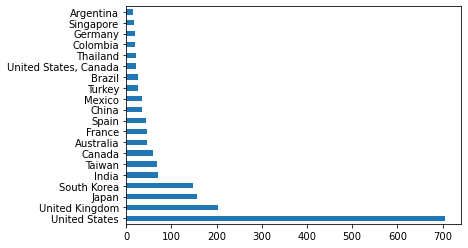

In [22]:
# Plotar gráfico de barras na horizontal
df_tv_show["country"].value_counts().head(20).plot.barh()

<AxesSubplot:title={'center':'Quantidade de Tv Show lançados nos 15 primeiros países'}>

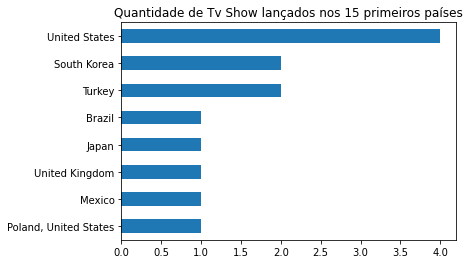

In [23]:
# reverter o grafico, melhorando
#colocar título no gráfico
df_tv_show["country"].head(15).value_counts(ascending=True).plot.barh(
    title="Quantidade de Tv Show lançados nos 15 primeiros países")